#Using Logistic Regression Modeling to derive Text sentimization from Social Media Platforms.

#Machine Learning-Driven Sentiment Analysis of Social Media Data in the 2024 U.S. Presidential Race



linked below was the article I used to compare against when it came to determining the best methods and benchmarks for my model creation.

https://journal.fkpt.org/index.php/BIT/article/view/1762/768

This project implements a sentiment classification pipeline aligned with the goals of Samsir et al. (2024), which analyzed public sentiment during the U.S. Presidential Race using machine learning. While the article employed a transformer-based BERT model for three-way sentiment classification, this work uses TF-IDF vectorization with logistic regression as a baseline. Future enhancements could incorporate transformer models, candidate-specific analysis, and temporal sentiment tracking to more closely replicate and build upon the original study's methodology.


# Imports and Setup

In [55]:
# --- Imports and Environment Setup ---
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
import nltk
nltk.download('stopwords')

#printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Load and Inspect Dataset

In [57]:

#Loading the data from a csv file

X_data = pd.read_csv("/content/x_en_dataset.csv",encoding = 'ISO-8859-1' )
#facebook_data
#Instagram_Data
#Checking number of rows and collumns
X_data.shape


(5000, 11)

Looking at the shape of the data, I correctly have 5000 entries as meaning the data was correctly uploaded

In [58]:

X_data.head()


,date,original_text,url,author_hash,language,primary_theme,english_keywords,sentiment,main_emotion,secondary_themes,cleaned_text
0,2024-12-03T18:13:09.000Z,They make us realize we have other options . T...,https://x.com/DarrylRoss72/status/186400999686...,f14ec6948ee11dedce31054f4127a4c24c42b7ec,en,People,"saturday, delivering, make, realize, options d...",-0.18,realization,[2 7],they make us realize we have other options the...
1,2024-12-07T05:07:31.000Z,This is how Grok2 AI represents this scenario....,https://x.com/5L4Y3R_0F_D00M/status/1865261836...,NaN,en,Technology,"varahavtar, grok2, badass, missed, scenario, y...",-0.05,neutral,[3 7],this is how grok ai represents this scenario y...
2,2024-12-04T04:00:06.000Z,I a pretty sure it may have been because they ...,https://x.com/Chrishall05/status/1864157706342...,NaN,en,Sports,"undefeated, pretty",-0.04,approval,[8 3 7],i a pretty sure it may have been because they ...
3,2024-12-06T23:02:22.000Z,Check out R! It's the most underrated programm...,https://x.com/nrachabathuni/status/18651699426...,913df5d294a176a797b8b4f5b4ad5a72927a751e,en,Technology,"data analysis, statistics, datascience, underr...",0.18,neutral,[3 7],check out r its the most underrated programmin...
4,2024-12-02T23:35:56.000Z,I came to this car just knowing I was about to...,https://x.com/_jayywalker/status/1863728840939...,25e3b6f98cbdea5f4715aec413139574f84b806f,en,Environment,"iâm, car, home smh, home, cold, knowing, smh...",-0.62,neutral,[10 3 7],i came to this car just knowing i was about to...


#Data Cleaning and Label Encoding

When it came to normalizing the data, I wanted to take the main emotion which was derived from sentiment to accurately sort the three main sentiments of "postive,negative,and neutral". Ultimately I created a model that ran for prediciting all three sentiments but found more prediction accuracy when the model just focused on the two sentiments of "positive and negative".

In [59]:

#Convert the main emotion Neutral to 0
#X_data.replace({'main_emotion':{'neutral':0}},inplace=True)


#Convert the main emotion Neutral to 1
#X_data.replace({'main_emotion':{'neutral':1}},inplace=True)

#remove neutral

X_data = X_data[X_data['main_emotion'] != 'neutral']

#Convert the happy emotion to 1
X_data.replace({'main_emotion':['admiration','approval','caring','curiosity','desire','excitment','gratitude','joy','love','optimism','pride','realization','surprise']}, 1,inplace=True)
#Convert the negative emotion to -1
X_data.replace({'main_emotion':['anger','annoyance','confusion','disappointment','disapproval','disgust','embarrassment','excitement','fear','nervousness','remorse','sadness']},-1,inplace=True)


# Convert the column to string type to avoid TypeError
X_data['main_emotion'] = X_data['main_emotion'].astype(str)

/tmp/ipython-input-59-4225022426.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data.replace({'main_emotion':['admiration','approval','caring','curiosity','desire','excitment','gratitude','joy','love','optimism','pride','realization','surprise']}, 1,inplace=True)
/tmp/ipython-input-59-4225022426.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_data.replace({'main_emotion':['anger','annoyance','confusion','disappointment','disapproval','disgust','embarrassment','excitement','fear','nervousness','remorse','

In [60]:
print(np.unique(X_data['main_emotion']))

['-1' '1']


As seen below, this halved the data set which mostly conveyed neutral tweets. Possibly having some way to balance the tweets without influencing the training set would lead to different results

In [61]:
#Checking the dsitribution of the target column
X_data['main_emotion'].value_counts()

,count
main_emotion,
1,1433
-1,719


#Text Preprocessing

Stemming the dataset was essential for extracting the individual words in each sentence, enabling the machine to better understand and predict sentence meaning based on the weight of each word,whether positive or negative.

In [62]:
port_stem = PorterStemmer()

def stemming(content):
        stemmed_content = re.sub('[^a-zA-Z]',' ', content)
        stemmed_content = stemmed_content.lower()
        stemmed_content = stemmed_content.split()
        stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
        stemmed_content = ' '.join(stemmed_content)
        return stemmed_content

X_data['stemmed_content']= X_data['original_text'].apply(stemming)

X_data.head()
print(X_data['stemmed_content'])
print(X_data['main_emotion'])

#seperating the data and label
X= X_data['stemmed_content'].values
Y= X_data['main_emotion'].values

print(X)
print(Y)

#splitting the data into training and test

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size =.2,stratify=Y,random_state=2)

print(X.shape,X_train.shape,X_test.shape)

print(X_train)
print(X_test)








0       make us realiz option see option deliv saturda...
2                                   pretti sure may undef
5       ye sir appreci allow worthi promot tini self s...
10                                       degre whose idea
11                                              jesu lord
                              ...                        
4990    jew feminist respons bro horrif hairlin get fu...
4992                  one run mk ultra program recent die
4993               went pick em along other lost tiebreak
4995                think enough cat health mainten parvo
4996                        sure mom ass get pretti messi
Name: stemmed_content, Length: 2152, dtype: object
0        1
2        1
5        1
10       1
11       1
        ..
4990    -1
4992     1
4993    -1
4995    -1
4996    -1
Name: main_emotion, Length: 2152, dtype: object
['make us realiz option see option deliv saturday adapt dumb'
 'pretti sure may undef'
 'ye sir appreci allow worthi promot tini self standup 

#Feature Extraction

Converting textual data to numerical data is a crucial step in preparing the text for  this machine learning models. Because algorithms cannot process raw text, each word or token must be transformed into a numerical representation. As we learned ,this can be done using techniques such as one-hot encoding, term frequency–inverse document frequency (TF-IDF), or word embeddings like Word2Vec. These numerical formats allow models to analyze patterns, relationships, and meaning within the text data. In contrast, the article by Samsir et al. (2024) used a fine-tuned BERT model to capture complex political sentiment in Twitter data, demonstrating how transformer-based models can understand deeper contextual relationships without traditional feature engineering.

In [63]:
#Converting the textual data to numerical data
vectorizer= TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)
X_test =vectorizer.transform(X_test)


print(X_train)
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17309 stored elements and shape (1721, 5341)>
  Coords	Values
  (0, 4140)	0.5527510538788177
  (0, 5001)	0.3325195301840691
  (0, 2996)	0.4002749753046474
  (0, 1697)	0.474476794649449
  (0, 1286)	0.4455880945066542
  (1, 2676)	0.35848511042735515
  (1, 818)	0.44929086355676734
  (1, 5146)	0.385662816744472
  (1, 3837)	0.6162959748570993
  (1, 4741)	0.37559234374779094
  (2, 5166)	0.18036589275837636
  (2, 4666)	0.15458817958664803
  (2, 1417)	0.2120498780801495
  (2, 2076)	0.12663066141424267
  (2, 1923)	0.15207877092646552
  (2, 1379)	0.3752276049044194
  (2, 1660)	0.2973638148732065
  (2, 1859)	0.1773272948234815
  (2, 3230)	0.2237434943506946
  (2, 1654)	0.14763306434975376
  (2, 4036)	0.16377238719701065
  (2, 4538)	0.1773272948234815
  (2, 3703)	0.1773272948234815
  (2, 1368)	0.1920595090289215
  (2, 2800)	0.09461707243296409
  :	:
  (1718, 686)	0.3958374823813605
  (1718, 151)	0.19791874119068026
  (1719, 4666)	0.2529

#Model Training(Logistic Regression)

# Comparison with Research
This notebook implements a baseline sentiment classification model using TF-IDF and logistic regression. In contrast, the article by Samsir et al. (2024) used a fine-tuned BERT model to capture complex political sentiment in Twitter data.



In [64]:
#Training the logistical Model


#Logistic Regression

model = LogisticRegression(max_iter=10000)
model.fit(X_train,Y_train)







LogisticRegression(max_iter=10000)

In [65]:
#Model Eval
#AccuracyScore

#Accuaracy score on training data
X_train_prediction= model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)




In [66]:
print("Accuracy Score on the training data : ",training_data_accuracy)

Accuracy Score on the training data :  0.8221963974433469


In [67]:
#Accuaracy score on test data
X_test_prediction= model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

print("Accuracy Score on the testing data : ",test_data_accuracy)


Accuracy Score on the testing data :  0.703016241299304


In [68]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

#loading the saved model

loaded_model = pickle.load(open('/content/trained_model.sav','rb'))

X_new= X_test[200]
print(Y_test[200])


prediction = model.predict(X_new)
print (prediction)

if (prediction[-1]==-1):
        print('Negative Tweet')

else:
        print('Positive Tweet')

1
['1']
Positive Tweet


In [69]:
X_new= X_test[15]
print(Y_test[15])


prediction = model.predict(X_new)
print (prediction)

if (prediction[-1]==-1):
        print('Negative Tweet')

else:
        print('Positive Tweet')

1
['1']
Positive Tweet


In [70]:
X_new= X_test[17]
print(Y_test[17])


prediction = model.predict(X_new)
print (prediction)

if (prediction[-1]==-1):
        print('Negative Tweet')

else:
        print('Positive Tweet')

1
['1']
Positive Tweet


In [71]:
X_new= X_test[3]
print(Y_test[3])


prediction = model.predict(X_new)
print (prediction)

if (prediction[-1]==-1):
        print('Negative Tweet')

else:
        print('Positive Tweet')

1
['1']
Positive Tweet


 # Model Evaluation

#Logistic regression **Model**

In [72]:
#F1 and other metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np



Y_pred = model.predict(X_test)

# Calculate and print per-class precision, recall, and F1-score
precision_per_class = precision_score(Y_test, Y_pred, average=None, zero_division=1)
recall_per_class = recall_score(Y_test, Y_pred, average=None, zero_division=1)
f1_per_class = f1_score(Y_test, Y_pred, average=None, zero_division=1)

# Get the unique labels
unique_labels = np.unique(Y_test)

print("Metrics per class:")
for i, label in enumerate(unique_labels):
    print(f"Class {label} - Precision: {precision_per_class[i]:.3f}, Recall: {recall_per_class[i]:.3f}, F1-Score: {f1_per_class[i]:.3f}")


print("\nMacro F1 Score:", f1_score(Y_test, Y_pred, average='macro'))
print("Weighted F1 Score:", f1_score(Y_test, Y_pred, average='weighted'))


print("Overall Accuracy:", accuracy_score(Y_test, Y_pred))

Metrics per class:
Class -1 - Precision: 0.786, Recall: 0.153, F1-Score: 0.256
Class 1 - Precision: 0.697, Recall: 0.979, F1-Score: 0.814

Macro F1 Score: 0.5351533535557802
Weighted F1 Score: 0.6278344074064516
Overall Accuracy: 0.703016241299304


Confusion Matrix

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test, X_test_prediction))


[[ 22 122]
 [  6 281]]
              precision    recall  f1-score   support

          -1       0.79      0.15      0.26       144
           1       0.70      0.98      0.81       287

    accuracy                           0.70       431
   macro avg       0.74      0.57      0.54       431
weighted avg       0.73      0.70      0.63       431



Heat Map

<Axes: >

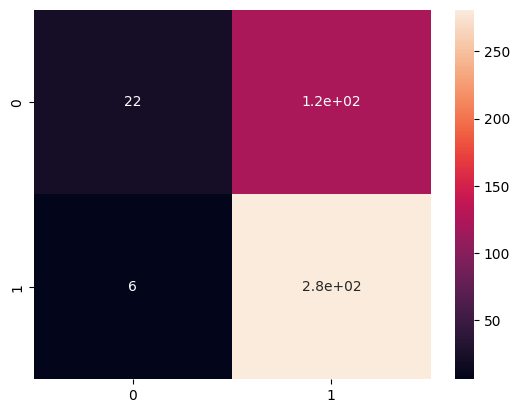

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True)




Based on the performance metrics of this Logistic Regression model, the high recall and F1 scores for positive and neutral sentiment, combined with strong training accuracy (80%) and solid generalization on positive sentiment in the test set, provide a strong foundation for further refinement. These results suggest that Logistic Regression could be a viable baseline model for sentiment analysis, and with additional tuning and preprocessing, it can help assess whether this approach is suitable for capturing more nuanced sentiment patterns in textual data.




#WHEN PREDICTING NEUTRAL,POSITIVE,AND NEGATIVE

#Train Accuracy 80%

#WHEN PREDICTING POSITIVE,AND NEGATIVE
#Train Accuracy 80%
#Test Accurary 68%
#Metrics per class:
#Class -1:
[Precision: 0.0.786] [Recall: 0.153] [F1-Score: 0.256]

#Class 1
[Precision: 0.697] [Recall: 0.979] [F1-Score: 0.814]

#Macro F1 Score: 0.5351533535557802
#Weighted F1 Score: 0.6278344074064516
#Overall Accuracy: 0.703





#Test Accurary 68%

#Metrics per class:

#Class -1:
[Precision: 0.522]
[Recall: 0.083]
[F1-Score: 0.144]


#Class 0:
[Precision: 0.678]
[Recall: 0.937]
[F1-Score: 0.786]


#Class 1
[Precision: 0.720] [Recall: 0.476] [F1-Score: 0.573]

#Macro F1 Score: 0.5009316055123301
#Weighted F1 Score: 0.6327441201188044
#Overall Accuracy: 0.682
Data:
5k rows of English language, x.com data from Hugging Face
Pre-processed in dataset_cleaning.ipynb file.

In [75]:
#Test Accurary 68%
#Metrics per class:
#Class -1 - Precision: 0.522, Recall: 0.083, F1-Score: 0.144
#Class 0 - Precision: 0.678, Recall: 0.937, F1-Score: 0.786
#Class 1 - Precision: 0.720, Recall: 0.476, F1-Score: 0.573

#Macro F1 Score: 0.5009316055123301
#Weighted F1 Score: 0.6327441201188044
#Overall Accuracy: 0.682
#Data
#5k rows of English language, x.com data from Hugging Face
#Pre-processed in dataset_cleaning.ipynb file.





#Metrics per class:
#Class -1 - Precision: 0.786, Recall: 0.153, F1-Score: 0.256
#Class 1 - Precision: 0.697, Recall: 0.979, F1-Score: 0.814

#Macro F1 Score: 0.5351533535557802
#Weighted F1 Score: 0.6278344074064516
#Overall Accuracy: 0.703016241299304